In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

In [13]:
supply_data= pd.read_csv('C:/Users/Patron/Desktop/study/fin 850/SupplyData.csv')
supply_data['Date'] = pd.to_datetime(supply_data['Date'])
supply_data = supply_data.sort_values('Date')
supply_data['Supply'] = supply_data['Supply'].str.replace(',', '').astype(float)
supply_data=supply_data.set_index('Date')

In [11]:
supply_data

,Supply,72 Day Temperature,72 Day Precipitation
Date,,,
2021-02-08,42880791.0,15.41,0.26
2021-02-09,42698507.0,15.37,0.26
2021-02-10,41714308.0,15.38,0.20
2021-02-11,41718366.0,15.36,0.17
2021-02-12,43395733.0,15.29,0.17
...,...,...,...
2024-05-09,50845562.0,27.10,3.79
2024-05-10,51298151.0,27.11,3.99
2024-05-13,49646488.0,27.17,4.24


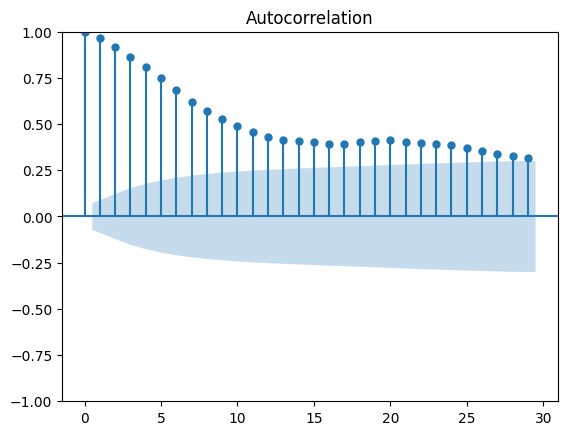

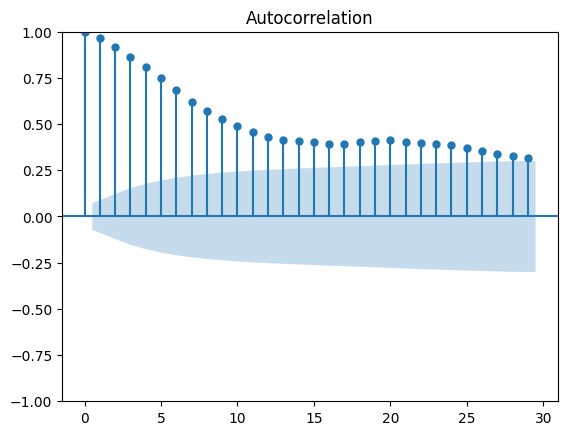

In [ ]:
plot_acf(supply_data['Supply'])#q=0

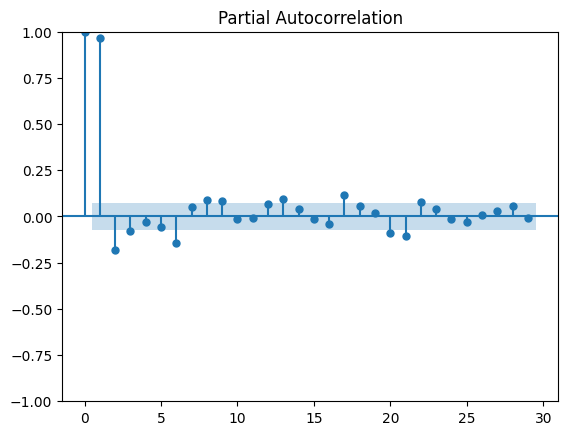

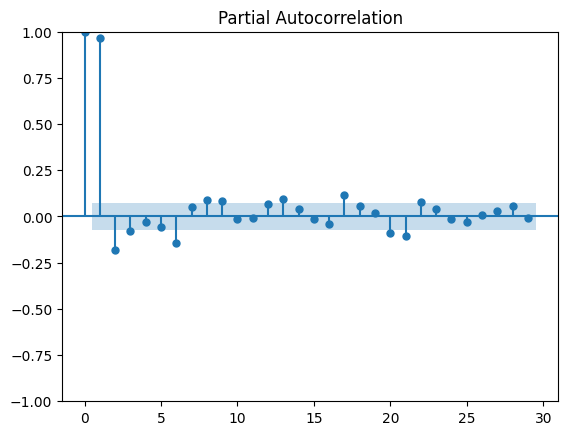

In [ ]:
plot_pacf(supply_data['Supply'])#p=2

In [ ]:
diff_series = supply_data.diff().dropna()
results=adfuller(diff_series['Supply'])
results
#d=0

(np.float64(-7.616034893172783),
 np.float64(2.1906336272185066e-11),
 20,
 716,
 {'1%': np.float64(-3.439516060164992),
  '5%': np.float64(-2.8655850998755263),
  '10%': np.float64(-2.5689240826597173)},
 np.float64(22650.356947099528))

C:\Users\Patron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Patron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Patron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when 

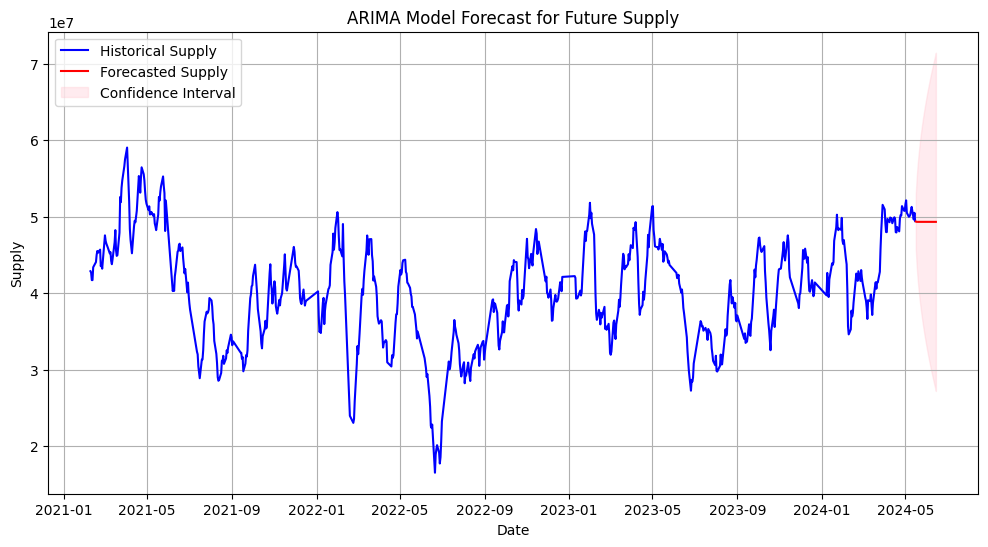

In [ ]:
# Fit ARIMA model
p, d, q = 2, 1, 0 # Initial guess; can be optimized later
model = ARIMA(supply_data['Supply'], order=(p, d, q))
model_fit = model.fit()

# Predict future supply
supply_data.index = pd.DatetimeIndex(supply_data.index).to_period('D').to_timestamp()
forecast_steps = 30  # Forecast for the next 30 days
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=supply_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(supply_data['Supply'], label="Historical Supply", color="blue")
plt.plot(forecast_index, forecast_mean, label="Forecasted Supply", color="red")
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="pink", alpha=0.3, label="Confidence Interval")
plt.title("ARIMA Model Forecast for Future Supply")
plt.xlabel("Date")
plt.ylabel("Supply")
plt.legend()
plt.grid(True)
plt.show()

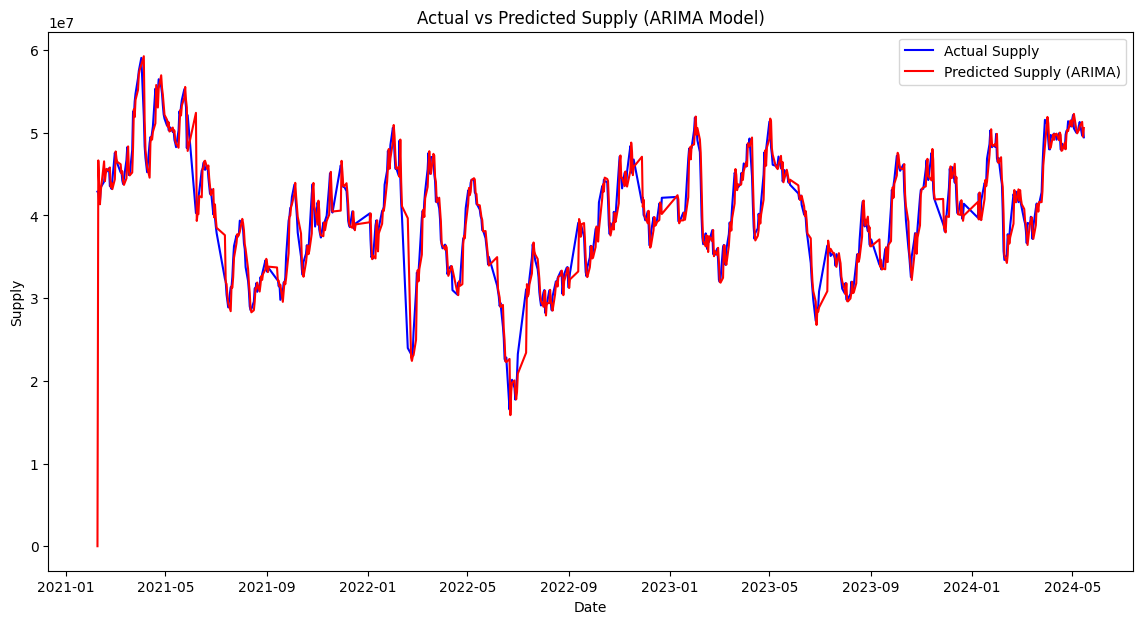

(np.float64(1368097.356511629), np.float64(2422796.530440938))

In [ ]:
# In-sample predictions on the existing data
supply_data['Predicted Supply'] = arima_result.fittedvalues

# Calculate error metrics
mae = mean_absolute_error(supply_data['Supply'], supply_data['Predicted Supply'])
rmse = np.sqrt(mean_squared_error(supply_data['Supply'], supply_data['Predicted Supply']))

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(supply_data.index, supply_data['Supply'], label='Actual Supply', color='blue')
plt.plot(supply_data.index, supply_data['Predicted Supply'], label='Predicted Supply (ARIMA)', color='red')
plt.title('Actual vs Predicted Supply (ARIMA Model)')
plt.xlabel('Date')
plt.ylabel('Supply')
plt.legend()
plt.show()

mae, rmse

C:\Users\Patron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Patron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


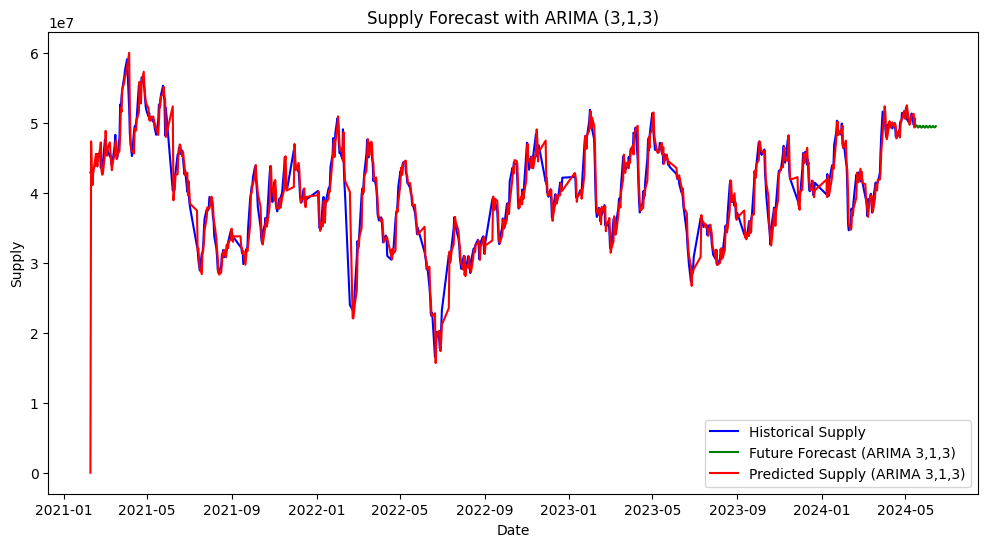

(np.float64(0.8823855785523311),
          Date  Forecasted Supply
 20 2024-06-05       4.953833e+07
 21 2024-06-06       4.945386e+07
 22 2024-06-07       4.931485e+07
 23 2024-06-08       4.932681e+07
 24 2024-06-09       4.946779e+07
 25 2024-06-10       4.952722e+07
 26 2024-06-11       4.942030e+07
 27 2024-06-12       4.930872e+07
 28 2024-06-13       4.935629e+07
 29 2024-06-14       4.948859e+07)

In [ ]:
# Calculate R-squared for the ARIMA (3,1,3) model
ss_total_best = np.sum((supply_data['Supply'] - supply_data['Supply'].mean())**2)
ss_residual_best = np.sum((supply_data['Supply'] - supply_data['Predicted Supply (3,1,3)'])**2)
r_squared_best = 1 - (ss_residual_best / ss_total_best)

# Future predictions for the next 30 days
future_forecast = arima_result_best.forecast(steps=30)
forecast_index_best = pd.date_range(start=supply_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')

# Plot future forecast
plt.figure(figsize=(12, 6))
plt.plot(supply_data['Supply'], label='Historical Supply', color='blue')
plt.plot(forecast_index_best, future_forecast, label='Future Forecast (ARIMA 3,1,3)', color='green')
plt.plot(supply_data['Predicted Supply (3,1,3)'], label='Predicted Supply (ARIMA 3,1,3)', color='red')
plt.title('Supply Forecast with ARIMA (3,1,3)')
plt.xlabel('Date')
plt.ylabel('Supply')
plt.legend()
plt.show()

# Display R-squared and forecasted values
forecast_df_best = pd.DataFrame({'Date': forecast_index_best, 'Forecasted Supply': future_forecast.values})
r_squared_best, forecast_df_best.tail(10)
